The Roy model [@@Roy1951] provides the modern framework for modeling occupational choices as an earnings maximization problem.

<!-- PELICAN_END_SUMMARY -->

Assume that there are multiple sectors $j$ in the economy with $j=1, 2$. Individual skills, $S_j$, are drawn from a multivariate normal distribution. Each skill is associated with a price $\pi_j$ per skill unit which leads to the following wage formula:

$$\begin{align*}
    \log W_j &= \log \pi_j + S_j\\
             &= \log \pi_j + \mu_j + u_j
\end{align*}$$

The basic model does not include costs for working in one of the sectors. Considering an example where sectors represent different countries, costs stand for emigrating into the other country.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

In [2]:
number_of_agents = 1000

π_1 = 1.0
π_2 = 1.0

error_distribution_mean = np.zeros(2)
error_distribution_corr = 0.25
error_distribution_covariance = np.array([
    [1, error_distribution_corr],
    [error_distribution_corr, 1]
])

u_1, u_2 = np.random.multivariate_normal(
    error_distribution_mean,
    error_distribution_covariance,
    number_of_agents
).T

μ_1 = 5
μ_2 = 5

S_1 = μ_1 + u_1
S_2 = μ_2 + u_2

wage_1_log = np.log(π_1) + S_1
wage_2_log = np.log(π_2) + S_2

is_working_in_sector_1 = np.where(wage_2_log < wage_1_log, True, False)

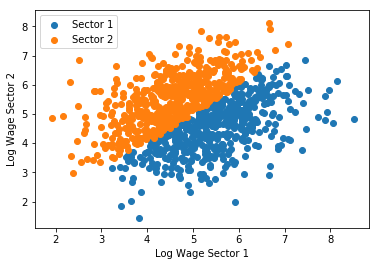

In [3]:
plt.scatter(
    wage_1_log[is_working_in_sector_1],
    wage_2_log[is_working_in_sector_1],
    label="Sector 1"
)
plt.scatter(
    wage_1_log[~is_working_in_sector_1],
    wage_2_log[~is_working_in_sector_1],
    label="Sector 2"
)

plt.xlabel("Log Wage Sector 1")
plt.ylabel("Log Wage Sector 2")

plt.legend()

plt.show()
plt.close()

The selection into sectors affects the distribution of wages which are observed by researchers. We get the density of observed and all wages using a gaussian kernel. The different distributions are shown below. Note that the distribution has a higher mean than the distribution of all wages because people chose sector one only if it is optimal for them.

In [4]:
kernel_1_observed = gaussian_kde(wage_1_log[is_working_in_sector_1])
kernel_1 = gaussian_kde(wage_1_log)

positions = np.linspace(0, 10, 1000)

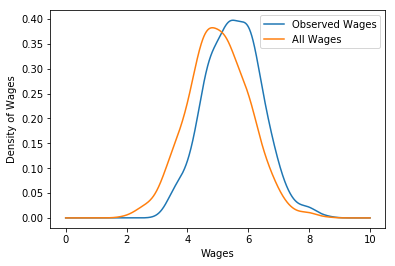

In [5]:
plt.plot(
    positions, 
    kernel_1_observed(positions), 
    label="Observed Wages"
)
plt.plot(positions, kernel_1(positions), label="All Wages")

plt.xlabel("Wages")
plt.ylabel("Density of Wages")

plt.legend()

plt.show()
plt.close()

In [9]:
kernel_2_observed = gaussian_kde(wage_2_log[~is_working_in_sector_1])
kernel_2 = gaussian_kde(wage_2_log)

positions = np.linspace(0, 10, 1000)

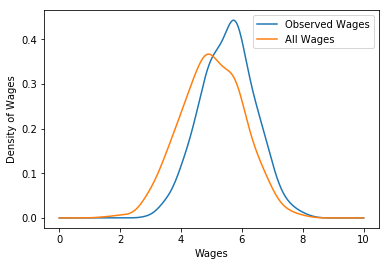

In [10]:
plt.plot(
    positions, 
    kernel_2_observed(positions), 
    label="Observed Wages"
)
plt.plot(positions, kernel_2(positions), label="All Wages")

plt.xlabel("Wages")
plt.ylabel("Density of Wages")

plt.legend()

plt.show()
plt.close()

Further references:
- https://hceconomics.uchicago.edu/sites/default/files/5_HO_RoyModel_Econ350_SLIDES_2016-01-03a_jbb.pdf